In [2]:
import pandas as pd

# 1. Carregar o dataset
file_path = "C:/Users/afili/Desktop/Uni/Mestrado/AASE/apartments_for_rent_100k_final.csv"
data = pd.read_csv(file_path, sep=';')

# 2. Definir as colunas que deseja verificar por outliers
numerical_features = ['price', 'square_feet', 'bathrooms', 'bedrooms']

# 3. Função para remover outliers usando IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        
        # Filtrar dados dentro dos limites
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# 4. Aplicar a função para remover outliers
data_cleaned = remove_outliers(data, numerical_features)

# 5. Verificar o tamanho do dataset após remoção
print(f"Tamanho original do dataset: {data.shape}")
print(f"Tamanho após remoção de outliers: {data_cleaned.shape}")

Tamanho original do dataset: (99842, 53)
Tamanho após remoção de outliers: (97935, 53)


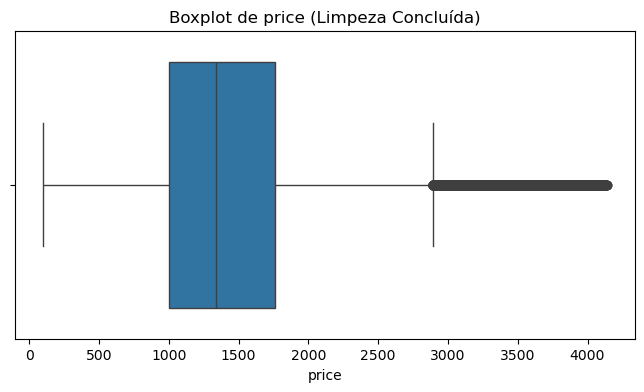

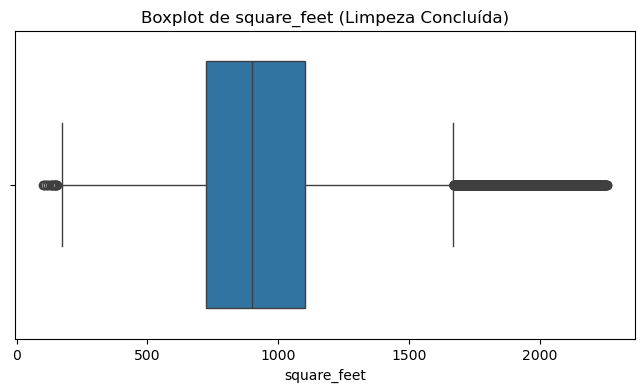

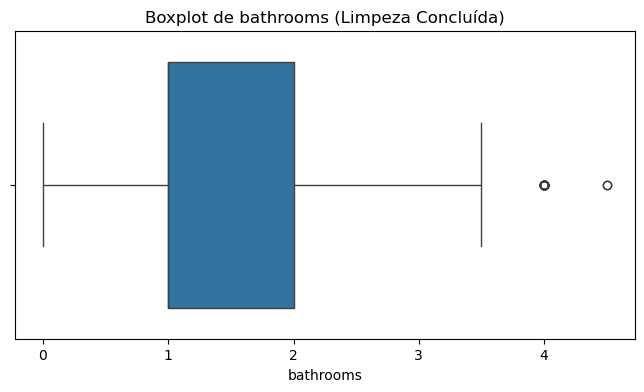

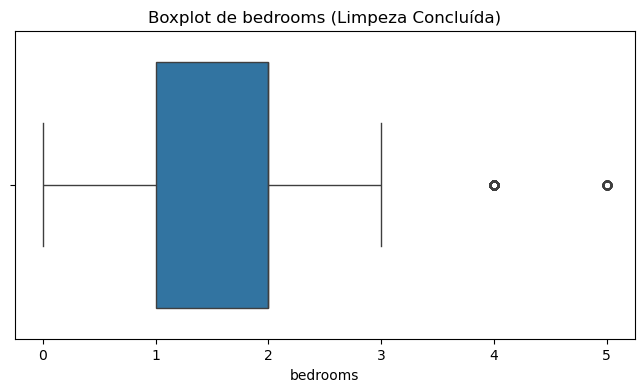

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in ['price', 'square_feet', 'bathrooms', 'bedrooms']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_cleaned[col])
    plt.title(f"Boxplot de {col} (Limpeza Concluída)")
    plt.show()
